<a href="https://colab.research.google.com/github/hagarbarakat/Pattern-Recognition/blob/master/Sheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LDA**


Use eig instead of eigh as S_inv*B isn't symmetric

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from numpy.linalg import eig, inv


Mean for triangles = [4. 5.]

Mean for circles = [7. 4.]

Difference= [[-3.  1.]]

B Matrix :
 [[ 9. -3.]
 [-3.  1.]]

S^-1.B =
 [[ 0.591 -0.197]
 [-0.417  0.139]]

Eigenvalues (Σ):
 [0.73 0.  ]

Eigenvectors (Σ):
 [[ 0.81708279  0.31622777]
 [-0.57652035  0.9486833 ]]

Eigenvalues in descending order:
0.73
0.0

Largest Eigenvalue=  0.73

W: 
 [ 0.81708279 -0.57652035]


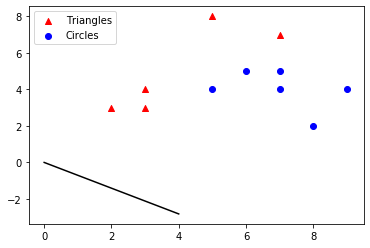

In [0]:
#Data matrices
tri = np.array([[2,3],[3,3],[3,4],[5,8],[7,7]])
circle = np.array([[5,4],[6,5],[7,5],[7,4],[8,2],[9,4]])
# mean for each class
mean_tri = np.mean(tri, axis = 0)
mean_circle = np.mean(circle, axis = 0)
print("Mean for triangles =", mean_tri)
print("\nMean for circles =", mean_circle)
diff = (mean_tri - mean_circle).reshape(1, 2)
print("\nDifference=", diff)
B =  np.dot(diff.T, diff)
print("\nB Matrix :\n", B)
S = np.array([[0.056, -0.029],[-0.029, 0.052]])
M = S.dot(B)
print("\nS^-1.B =\n", M)
val, vec = eig(M)
print("\nEigenvalues (Σ):\n", val)
print("\nEigenvectors (Σ):\n",vec)
eig_pairs = [(np.abs(val[i]), vec[:,i]) for i in range(len(val))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
print("\nLargest Eigenvalue= ", eig_pairs[0][0])
print("\nW: \n", eig_pairs[0][1])
w = eig_pairs[0][1]
# TODO: plotting
plt.scatter(tri[:, 0], tri[:, 1], c = 'red', marker = "^", label = "Triangles")
plt.scatter(circle[:, 0], circle[:, 1], c = 'blue', label = "Circles")
x = np.linspace(0, 4, 1000)
plt.plot(x, x*w[1]/w[0], c = "black")
plt.legend()
plt.show()

**Midterm Question Fall 2017**

Mean class 1:
 [1.33333333 1.33333333]

Mean class 2:
 [2.5 2. ]

Matrix B:
[[1.36111111 0.77777778]
 [0.77777778 0.44444444]]

S+1:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

S-1: 
 [[0.5 0. ]
 [0.  0. ]]

S: 
 [[ 1.16666667 -0.33333333]
 [-0.33333333  0.66666667]]

S inverse:
 [[1.   0.5 ]
 [0.5  1.75]]

S^-1.B =
 [[1.75       1.        ]
 [2.04166667 1.16666667]]

Eigenvalues (Σ):
 [2.91666667e+00 2.22044605e-16]

Eigenvectors (Σ):
 [[ 0.65079137 -0.49613894]
 [ 0.7592566   0.86824314]]

Eigenvalues in descending order:
2.916666666666668
2.220446049250313e-16

Largest Eigenvalue=  2.916666666666668
cccc:
 [0.65079137 0.7592566 ]

W: 
 [0.65079137 0.7592566 ]


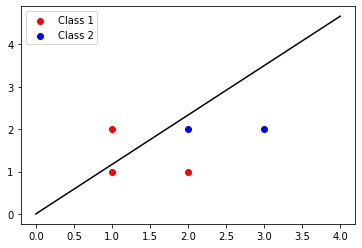

In [0]:
class_1 = np.array([[1,1],[2,1],[1,2]])
class_2 = np.array([[2,2],[3,2]])
# Compute μ+1 and μ−1
mean_class1= np.mean(class_1, axis = 0)
mean_class2= np.mean(class_2, axis = 0)
print("Mean class 1:\n",mean_class1)
print("\nMean class 2:\n", mean_class2)
# Compute B
diff = (mean_class1-mean_class2).reshape(1,2)
B = np.dot(diff.T, diff)
print("\nMatrix B:", B, sep="\n")
# Compute S+1 and S−1
S_class1 = (len(class_1)-1)*np.cov(class_1.T)
S_class2 = (len(class_2)-1)*np.cov(class_2.T)
print("\nS+1:\n", S_class1)
print("\nS-1: \n", S_class2)
# Compute S
S = S_class1 + S_class2
print("\nS: \n", S)
#Compute S inverse
S_inv = inv(S) 
print("\nS inverse:\n", S_inv)
# Eigenvalues and eigenvectors
M = S_inv.dot(B)
print("\nS^-1.B =\n", M)
val, vec = eig(M)
print("\nEigenvalues (Σ):\n", val)
print("\nEigenvectors (Σ):\n",vec)
eig_pairs = [(val[i], vec[:,i]) for i in range(len(val))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
print("\nLargest Eigenvalue= ", eig_pairs[0][0])
# instead of pairs -> c is W
c = vec[:, np.argmax(val)]
print("cccc:\n",c)
w = eig_pairs[0][1]
print("\nW: \n", eig_pairs[0][1])
#TODO plot
plt.scatter(class_1[:, 0], class_1[:, 1], c = 'red', label = "Class 1")
plt.scatter(class_2[:, 0], class_2[:, 1], c = 'blue', label = "Class 2")
x = np.linspace(0, 4, 1000)
plt.plot(x, x*w[1]/w[0], c = "black")
plt.legend()
plt.show()